# SONAR DATASET

Data tells weather Sonar is hitting Rock ('R') or Mine ('M')

In [10]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from src.DataPreparer import DataPreparer
from src.FormalContext import FormalContext
from src.OtherModels import *
from src import FCADecisionTree as FCADtree

import pandas as pd

DATA_CSV_FILE_PATH = 'C:\\Users\\Focus\\Desktop\\TFG\\TFG\\fca-decision-tree-classifier\\datasets\\real_datasets\\sonar_data.csv'
TREES_MAX_DEPTH = 4

df = pd.read_csv(DATA_CSV_FILE_PATH)
df.describe()


,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [12]:
df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Prueba inicial del árbol básico c4.5, obtención de sus umbrales

In [13]:
from src.DecisionTreeC45 import DecisionTreeC45
from sklearn.model_selection import train_test_split

data = df.copy()
taget_column = -1

X = data.iloc[:, :-1]  # Todas las columnas excepto la última
y = data.iloc[:, -1]   # La última columna

# Convertir X a una lista de listas y y a una lista
X_list = X.values.tolist()
y_list = y.values.tolist()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión C4.5
attribute_names = X.columns.tolist()

decision_tree_c45 = DecisionTreeC45(attribute_names=attribute_names, max_depth=TREES_MAX_DEPTH)
decision_tree_c45.train_tree(X_train, y_train)


predictions_treec45 = decision_tree_c45.classify_instances(X_test)

decision_tree_c45.evaluation_metrics(y_test, predictions_treec45, average='macro') 
decision_tree_c45.print_tree_structure()

# Obtener los umbrales de los atributos continuos
thresholds = decision_tree_c45.get_thresholds()

print("Umbrales de los atributos continuos:", thresholds)

Accuracy: 0.6666666666666666
Precision: 0.6312997347480106
Recall: 0.6222222222222222
F1 Score: 0.625
Confusion Matrix:
[[21  6]
 [ 8  7]]
Classification Report:
              precision    recall  f1-score   support

           M       0.72      0.78      0.75        27
           R       0.54      0.47      0.50        15

    accuracy                           0.67        42
   macro avg       0.63      0.62      0.62        42
weighted avg       0.66      0.67      0.66        42

Attribute: 0.1609 <= 0.1117
  Attribute: 0.0207 <= 0.08135
    Decision: R
    Decision: M
  Attribute: 0.0660 <= 0.06655
    Decision: R
    Attribute: 0.2641 <= 0.042249999999999996
      Decision: R
      Attribute: 0.2238 <= 0.05645
        Decision: R
        Decision: M
Umbrales de los atributos continuos: {10: [0.1117], 3: [0.08135], 14: [0.06655], 44: [0.042249999999999996], 12: [0.05645]}


# Preparado de los datos, utilización de los mismos umbrales del C4.5

In [14]:
data_preparer = DataPreparer()
data_preparer.prepare_csvfile_data(
    file_path=DATA_CSV_FILE_PATH,
    discretizing_thresholds=thresholds  # Pasar los umbrales obtenidos del modelo C4.5
)

X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized()
labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)

objects = list(labeled_train_data.index)
properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
num_objects = len(objects)
num_properties = len(properties)

print(f"Number of Objects: {num_objects}")
print(f"Number of Properties-Attributes: {num_properties}")

labeled_train_data.info()

Number of Objects: 165
Number of Properties-Attributes: 10227
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 10228 entries, 0.0200_0.0015 to objective_target
dtypes: float64(10227), object(1)
memory usage: 12.9+ MB


# Computación del contexto formal y prueba del árbol FCA:

Tamaño máximo del contexto: 1687455
Tiempo de ejecución para el retículo: 37.68 segundos

Finalizando Algoritmo:
Número de conceptos formales: 1024

Vector a clasificar:  ['0.0200_0.0217', '0.0371_0.0152', '0.0428_0.0346', '0.0207_0', '0.0954_0.0484', '0.0986_0.0526', '0.1539_0.0773', '0.1601_0.0862', '0.3109_0.1451', '0.2111_0.211', '0.1609_1', '0.1582_0.2087', '0.2238_1', '0.0645_0.1689', '0.0660_1', '0.2273_0.1967', '0.3100_0.2934', '0.2999_0.3709', '0.5078_0.4309', '0.4797_0.4161', '0.5783_0.5116', '0.5071_0.6501', '0.4328_0.7717', '0.5550_0.8491', '0.6711_0.9104', '0.6415_0.8912', '0.7104_0.8189', '0.8080_0.6779', '0.6791_0.5368', '0.3857_0.5207', '0.1307_0.5651', '0.2604_0.5749', '0.5121_0.525', '0.7547_0.4255', '0.8537_0.333', '0.8507_0.2331', '0.6692_0.1451', '0.6097_0.1648', '0.4943_0.2694', '0.2744_0.373', '0.0510_0.4467', '0.2834_0.4133', '0.2825_0.3743', '0.4256_0.3021', '0.2641_1', '0.1386_0.179', '0.1051_0.1689', '0.1343_0.1341', '0.0383_0.0769', '0.0324_0.0222', '0.0232_

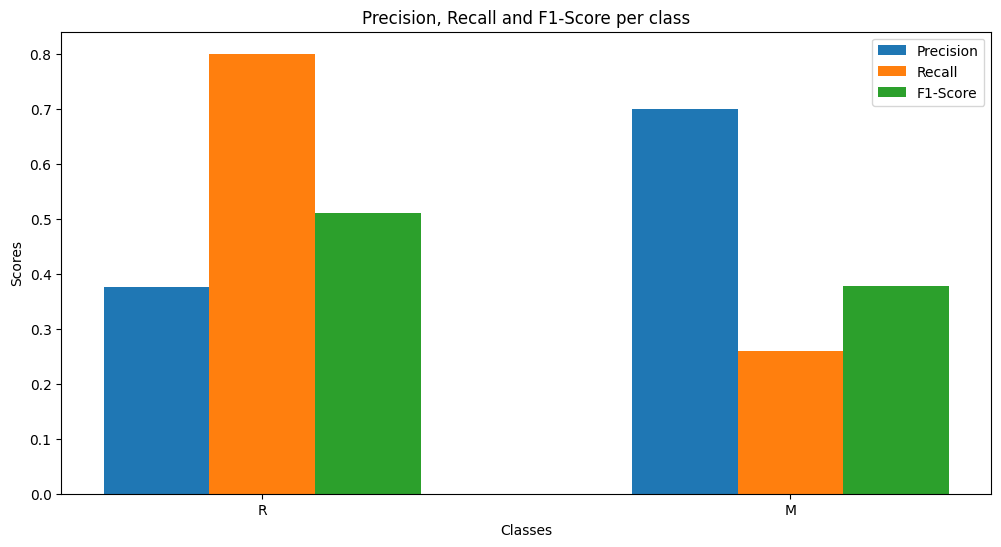

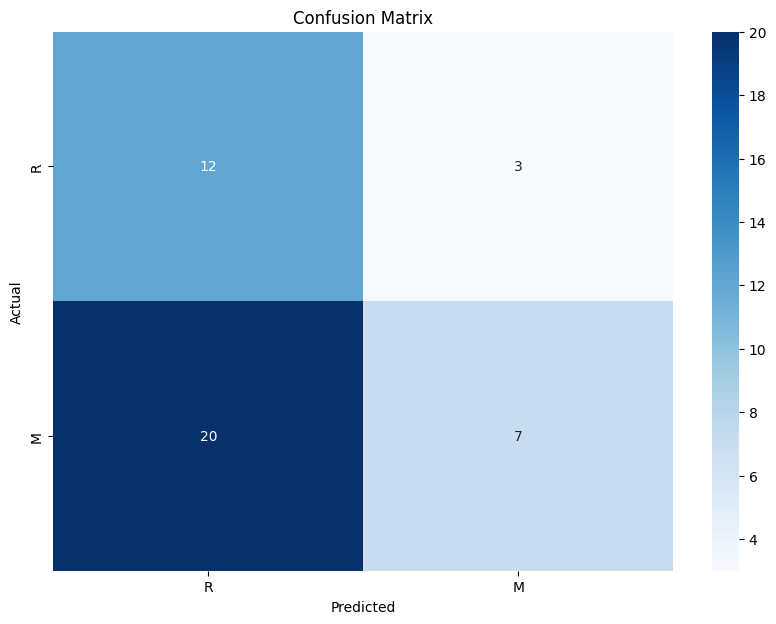

Execution Time: 0.24382615089416504 seconds
--------------------------------------------------
└── [0 - class-label: ROOT]
│   └── [217 - class-label: R]
│   └── [842 - class-label: R]
│   └── [852 - class-label: M]
│   └── [968 - class-label: M]
│   └── [1018 - class-label: M]
│   │   └── [966 - class-label: R]
│   │   └── [971 - class-label: M]
│   │   │   └── [838 - class-label: R]
│   │   │   │   └── [230 - class-label: R]
│   │   │   │   │   └── [48 - class-label: R]
│   │   │   │   └── [839 - class-label: M]
│   │   │   └── [1013 - class-label: M]
│   │   │   └── [1014 - class-label: R]
│   │   └── [1019 - class-label: R]
│   │   └── [1022 - class-label: R]
│   └── [1023 - class-label: M]
{'Tree Depth': 5, 'Total Nodes': 17, 'Leaf Nodes': 12, 'Average inmediate_subconcepts per Node': 0.8333333333333334}
{'Accuracy': 0.4523809523809524, 'Precision': {'R': 0.375, 'M': 0.7}, 'Recall': {'R': 0.8, 'M': 0.25925925925925924}, 'F1-Score': {'R': 0.5106382978723404, 'M': 0.3783783783783784

In [15]:
formal_context = FormalContext(labeled_data=labeled_train_data)
max_context_size = num_objects * num_properties
print(f"Tamaño máximo del contexto: {formal_context.max_context_size}")  
formal_context.build_lattice(debug=True, compute_parents_childs=True)

print("\nFinalizando Algoritmo:")
print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))

start_time = time.time()
decision_treeFCA = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=TREES_MAX_DEPTH)
results = decision_treeFCA.evaluate(X_test, y_test, debug=True, plot_results=True)
end_time = time.time()

# Imprimir el tiempo de ejecución
print(f"Execution Time: {end_time - start_time} seconds")
print("--------------------------------------------------")
#decision_treeFCA.print_tree_complete()
decision_treeFCA.print_tree_logic() 
complexity_info = decision_treeFCA.display_tree_complexity()
print(complexity_info)
print(results) 

# Prueba del árbol básico ID3

In [16]:
# Evaluación del modelo DecisionTreeID3
from src.DecisionTreeID3 import DecisionTreeID3

decision_treeid3 = DecisionTreeID3(attribute_names=properties, max_depth=TREES_MAX_DEPTH)

decision_treeid3.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

predictions_treeid3 = decision_treeid3.classify_instances(X_test.values.tolist())

decision_treeid3.evaluation_metrics(y_test, predictions_treeid3, average='macro')
decision_treeid3.print_tree_structure()


Accuracy: 0.6666666666666666
Precision: 0.6312997347480106
Recall: 0.6222222222222222
F1 Score: 0.625
Confusion Matrix:
[[21  6]
 [ 8  7]]
Classification Report:
              precision    recall  f1-score   support

           M       0.72      0.78      0.75        27
           R       0.54      0.47      0.50        15

    accuracy                           0.67        42
   macro avg       0.63      0.62      0.62        42
weighted avg       0.66      0.67      0.66        42

Attribute: 0.1609_0
Category: 0.0
  Attribute: 0.0660_0
  Category: 0.0
    Attribute: 0.2641_0
    Category: 0.0
      Attribute: 0.2238_0
      Category: 0.0
        Decision: M
      Category: 1.0
        Decision: R
    Category: 1.0
      Decision: R
  Category: 1.0
    Decision: R
Category: 1.0
  Attribute: 0.0207_0
  Category: 0.0
    Decision: M
  Category: 1.0
    Decision: R


Prueba de cross-validación:

In [17]:
decision_treeid3.test_CV(X, y, random_state=42, attribute_names=attribute_names, k=5, max_depth=4)

C:\Users\Focus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Focus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Focus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

Exactitud media: 0.5266
Precisión media: 0.2663
Recall media: 0.4926
F1-Score media: 0.3437
Desviación estándar de la Exactitud: 0.0671


C:\Users\Focus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Prueba adicional de los demás modelos

Prueba con preprocesamiento, discretizados y binarizados:

In [18]:
CROSS_VALIDATION = 1
METRICS_AVERAGE = 'weighted'

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Classifier: OneVsRestClassifier
Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 Score: 0.6666666666666666
Confusion Matrix:
[[20  7]
 [ 7  8]]
Execution Time: 0.126906156539917 seconds
--------------------------------------------------
Evaluating model: SVM
Classifier: SVC
Accuracy: 0.7857142857142857
Precision: 0.7879464285714286
Recall: 0.7857142857142857
F1 Score: 0.7733656174334139
Confusion Matrix:
[[25  2]
 [ 7  8]]
Execution Time: 0.5035703182220459 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Classifier: DecisionTreeClassifier
Accuracy: 0.6666666666666666
Precision: 0.6578249336870027
Recall: 0.6666666666666666
F1 Score: 0.6607142857142857
Confusion Matrix:
[[21  6]
 [ 8  7]]
Execution Time: 0.1671309471130371 seconds
--------------------------------------------------
Evaluating model: K-Nearest Neighbors
Classifier: KNeighborsClassifier
Accuracy: 0.61904

Prueba sin preprocesamiento, con los datos originales

In [19]:
CROSS_VALIDATION = 1
METRICS_AVERAGE = 'weighted'

data = df.copy()
taget_column = -1

X = data.iloc[:, :-1]  #
y = data.iloc[:, -1]   

X_list = X.values.tolist()
y_list = y.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X_list, y_list, test_size=0.2, random_state=42)

tryOtherModels(X_train, X_test, y_train, y_test, CROSS_VALIDATION, selected_average=METRICS_AVERAGE)

Evaluating model: Logistic Regression
Classifier: OneVsRestClassifier
Accuracy: 0.7619047619047619
Precision: 0.8264138607388034
Recall: 0.7619047619047619
F1 Score: 0.7662634847989539
Confusion Matrix:
[[18  9]
 [ 1 14]]
Execution Time: 0.016539573669433594 seconds
--------------------------------------------------
Evaluating model: SVM
Classifier: SVC
Accuracy: 0.7619047619047619
Precision: 0.8027210884353742
Recall: 0.7619047619047619
F1 Score: 0.7668650793650794
Confusion Matrix:
[[19  8]
 [ 2 13]]
Execution Time: 0.011515140533447266 seconds
--------------------------------------------------
Evaluating model: Decision Tree
Classifier: DecisionTreeClassifier
Accuracy: 0.5952380952380952
Precision: 0.6282467532467533
Recall: 0.5952380952380952
F1 Score: 0.6034985422740524
Confusion Matrix:
[[16 11]
 [ 6  9]]
Execution Time: 0.013015270233154297 seconds
--------------------------------------------------
Evaluating model: K-Nearest Neighbors
Classifier: KNeighborsClassifier
Accuracy: 

# TEST ESTADÍSTICO DEL FCATREE CON EL ID3 Y  EL C4.5

## Parámetros globales:

In [20]:
CLASSES_THRESHOLD = 0.6 # % de similitud de clases para la poda en el FCATREE
debug=False
max_depth = 5
random_state = 42
test_size = 0.3


OTHER_TREE_MODEL = "ID3" #primera prueba con el ID3

## Definición de funciones

In [21]:
import numpy as np
import pandas as pd
from scipy import stats
from mlxtend.evaluate import mcnemar_table, mcnemar
from scipy.stats import t as t_dist
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# test t de paridad
def paired_t_test(p):
        p_hat = np.mean(p)
        n = len(p)
        den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
        t = (p_hat * (n**(1/2))) / den
        
        p_value = t_dist.sf(t, n-1)*2
        
        return t, p_value

# PRUEBA DE TEST Z PARA DOS PORPORCIONES
def two_proportions_test(y_true, y_pred1, y_pred2):
    success_a = np.sum(y_pred1 == y_true)
    success_b = np.sum(y_pred2 == y_true)
    n_a = len(y_true)
    n_b = len(y_true)
    
    prop_a = success_a / n_a
    prop_b = success_b / n_b
    
    var_a = (prop_a * (1 - prop_a)) / n_a
    var_b = (prop_b * (1 - prop_b)) / n_b
    
    if var_a + var_b == 0:
        return 0, 1  # No hay diferencia significativa si no hay variabilidad
    
    z = (prop_a - prop_b) / np.sqrt(var_a + var_b)
    p_value = stats.norm.sf(abs(z)) * 2  # Test de dos colas
    
    return z, p_value

# PRUEBA DE MCNEMAR
def mcnemar_test(y_true, y_pred1, y_pred2):
    table = mcnemar_table(y_target=np.array(y_true), 
                          y_model1=np.array(y_pred1), 
                          y_model2=np.array(y_pred2))
    chi2, p = mcnemar(ary=table, corrected=True)
    return chi2, p

# PRUEBA T PAREADA
def resampled_paired_ttest(data_preparer, n_tests=30, test_size=None, max_depth=None):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD, debug
    p_ = []
    rng = np.random.RandomState(random_state)
    for i in range(n_tests):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(random_state=randint, test_size=test_size)

        # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
        # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())

        
        accuracy = accuracy_score(y_test, fca_model.classify_instances(X_test))
        if(debug):
            print("FCAMODEL: ", accuracy)
        accuracy = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        if(debug):
            print("OTHER: ", accuracy)
        

        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_.append(acc1 - acc2)

    t_stat, p_value = paired_t_test(p_)
    return t_stat, p_value



# CV DE 5 ITERACIONES DE 2 PLIEGUES
def cross_val_5x2_test(data_preparer, test_size, max_depth):
    global random_state, OTHER_TREE_MODEL, CLASSES_THRESHOLD,  debug

    def five_two_statistic(p1, p2):
        p1 = np.array(p1)
        p2 = np.array(p2)
        p_hat = (p1 + p2) / 2
        s = (p1 - p_hat)**2 + (p2 - p_hat)**2
        t = p1[0] / np.sqrt(1/5. * sum(s))
        
        p_value = t_dist.sf(t, 5)*2
        
        return t, p_value

    p_1 = []
    p_2 = []

    rng = np.random.RandomState(42)
    for i in range(5):
        randint = rng.randint(low=0, high=32767)
        X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=randint, test_size=test_size)

        # p1 evaluacion de train-test
            # para el modelo FCA
        labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())


        acc1 = accuracy_score(y_test, fca_model.classify_instances(X_test))
        acc2 = accuracy_score(y_test, other_tree_model.classify_instances(X_test.values.tolist()))
        p_1.append(acc1 - acc2)


        # p2 evaluacion de test-train
            # para el modelo FCA
        labeled_train_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
        formal_context = FormalContext(labeled_data=labeled_train_data)
        formal_context.build_lattice(debug=False, compute_parents_childs=True)
        fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
        
            # para el otro modelo ID3
        properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']

        if(OTHER_TREE_MODEL == "C45"):
            other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
        else:
            other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)


        other_tree_model.train_tree(data_preparer.X_test.values.tolist(), data_preparer.y_test.tolist())

        acc1 = accuracy_score(y_train, fca_model.classify_instances(X_train))
        acc2 = accuracy_score(y_train, other_tree_model.classify_instances(X_train.values.tolist()))
        p_2.append(acc1 - acc2)

    t, p = five_two_statistic(p_1, p_2)
    return t, p


def test_statistical(random_state, test_size, max_depth, data_preparer):
    X_train, X_test, y_train, y_test = data_preparer.get_train_test_split_data_binarized(debug=debug, random_state=random_state, test_size=test_size)

    print("#############################################################################")
    if(debug):
        print("\n\n\ESTRUCTURAS de datos de X e Y:\n", X, y, X_train, X_test, y_train, y_test)

    # Inicializar y proabr el modelo FCA
    labeled_train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
    formal_context = FormalContext(labeled_data=labeled_train_data)
    formal_context.build_lattice(debug=False, compute_parents_childs=True)
    print("\nFinalizando Algoritmo del retículo:")
    print("Número de conceptos formales:", len(formal_context.get_all_concepts_lattice()))
    fca_model = FCADtree.FCADecisionTree(formal_context=formal_context, max_depth=max_depth, classes_threshold=CLASSES_THRESHOLD)
    
    if(debug):
        fca_model.print_tree_logic()
        fca_model.print_tree_structure()

    fca_predicted_labels = fca_model.classify_instances(X_test)

    # Inicializar y probar el otro modelo
    properties = [prop for prop in labeled_train_data.columns if prop != 'objective_target']
    
    if(OTHER_TREE_MODEL == "C45"):
        other_tree_model = DecisionTreeC45(attribute_names=properties, max_depth=max_depth)
    else:
        other_tree_model = DecisionTreeID3(attribute_names=properties, max_depth=max_depth)

    other_tree_model.train_tree(data_preparer.X_train.values.tolist(), data_preparer.y_train.tolist())
    predictions_other_tree= other_tree_model.classify_instances(X_test.values.tolist())

    # Two Proportions Test
    z, p_proportions = two_proportions_test(y_test , fca_predicted_labels, predictions_other_tree)
    #print("two_proportions_test:", z, p_proportions)

     # McNemar’s Test
    chi2_mcnemar, p_mcnemar = mcnemar_test(y_test, fca_predicted_labels, predictions_other_tree)
    #print("mcnemar_test", chi2_mcnemar, p_mcnemar)
    
    # Resampled Paired t-test
    t_resampled, p_resampled = resampled_paired_ttest(data_preparer, n_tests=30, test_size=test_size, max_depth=max_depth)
    #print("resampled_paired_ttest", t_resampled, p_resampled)

    
    # 5x2 Cross-Validation Test
    t_5x2, p_5x2 = cross_val_5x2_test(data_preparer, test_size, max_depth)
    #print("cross_val_5x2_test", t_5x2, p_5x2)
    
    results = {
        "Two Proportions Test": (z, p_proportions),
        "McNemars Test": (chi2_mcnemar, p_mcnemar),
        "Resampled Paired t-test": (t_resampled, p_resampled),
        "5x2 Cross-Validation Test": (t_5x2, p_5x2)
    }
    
    return results


print(f"Parámetros de configuración:")
print(f"Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): {CLASSES_THRESHOLD}")
print(f"Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {thresholds}")
print(f"Profundidad máxima del árbol (max_depth): {max_depth}")
print(f"Estado aleatorio (random_state): {random_state}")
print(f"Tamaño del conjunto de prueba (test_size): {test_size}")

Parámetros de configuración:
Umbral de similitud de clases para la poda (CLASSES_THRESHOLD): 0.6
Umbrales de los atributos continuos usados en la discretización como en el c4.5:  {10: [0.1117], 3: [0.08135], 14: [0.06655], 44: [0.042249999999999996], 12: [0.05645]}
Profundidad máxima del árbol (max_depth): 5
Estado aleatorio (random_state): 42
Tamaño del conjunto de prueba (test_size): 0.3


## Prueba con el ID3

In [22]:
# Comparación estadística
# Entre FCADecisionTree y DecisionTreeID3
results_with_id3 = test_statistical(random_state, test_size, max_depth, data_preparer)

print("\nResultados entre y and DecisionTreeID3:")
for test_name, (statistic, p_value) in results_with_id3.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################


## Prueba con el C4.5

In [ ]:
OTHER_TREE_MODEL = "C45"

# Comparación estadística
# Entre FCADecisionTree y DecisionTreeC45
results_with_c45 = test_statistical(random_state, test_size, max_depth, data_preparer)
print("\nResults between FCADecisionTree and DecisionTreeC45:")
for test_name, (statistic, p_value) in results_with_c45.items():
    print(f"{test_name}: Statistic = {statistic}, p-value = {p_value}")


#############################################################################

Finalizando Algoritmo del retículo:
Número de conceptos formales: 149

Results between FCADecisionTree and DecisionTreeC45:
Two Proportions Test: Statistic = -4.508057302781465, p-value = 6.542390850164842e-06
McNemars Test: Statistic = 12.071428571428571, p-value = 0.0005120045221899044
Resampled Paired t-test: Statistic = -22.752717900306752, p-value = 2.0
5x2 Cross-Validation Test: Statistic = -4.255891725134576, p-value = 1.9919536269646074
